# **Line Plot**

Bu görselleştirmede dünya sıralamasındaki ilk 100 üniversitenin alıntı yapma skoru ve öğretme değerinin görselleştirilmesi amaçlanmaktadır.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade plotly 

In [ ]:
!pip install jupyter-dash

In [4]:
timesData = pd.read_csv("/content/drive/MyDrive/data/timesData.csv")

In [5]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [6]:
df = timesData.iloc[:100,:] #datadaki ilk 100 üniversite df değişkenine aktarılmıştır.
                            #datada total_score göre world_rank değeri belirlendiği için tekrardan sıralama yapmaya gerek yoktur.

Plotly'da bir kalıp vardır. Bu kalıp doğrultusunda görselleştirme yapılır.

kullanılan kalıp;

**trace** kısmı oluşturulurken

*   **x** = x eksenine koyulacak sütun yazılır.
*   **y** = x eksenine koyulacak sütun yazılır.
*   **mode** = kullanılacak plotun türüdür.
*   **name** = trace'in adıdır, kenarda hangi renkte hangi verinin kullanıldığının bilgisini verir.
*   **marker** = dictionarylerle birlikte kullanılır, renk ve saydamlık belirlenir.
*   **text** = plotun üzerinde gezinirken değerin ait olduğu bilgidir.

**data** = traceler eklendiği listedir.

**layout** = dictionarydir ve içerisinde şunları barındırır;
*   **title** = başlık bilgisi
*   **x axis** = bir dictionarydir ve içerisinde şunları barındırır;
  *   **title** = x ekseninin adı
  *   **ticklen** = x eksenindeki başlığın kalınlığı
  *   **zeroline** = False olduğunda sıfırdan geçen çizgiler devre dışı bırakılır.

**fig** = datayı ve layoutu içeren bir figür oluşturulur.

**iplot()** = içerisinde data ve layout bulunan figür plot edilir.














In [7]:
# Creating trace1
trace1 = go.Scatter( 
                    x = df.world_rank, #dünya sıralamasındaki ilk 100 üniversite x eksenine aktarıldı.
                    y = df.citations,  #ilk 100 üniversitenin alıntı yapılma skorkları y eksenine aktarılmıştır.
                    mode = "lines", #line plot kullanılacaktır.
                    name = "citations", #trace'in adıdır.
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),  #rgb -> kırmızı, yeşil, mavi renklerin karışımından oluşur.Değerler 0-225 arasındadır.
                    text= df.university_name)  #bir değerin üzerine gelindiğinde üniversite adı gözükür.      #a -> alpha yani saydamlık değeridir.                      
                                                                            
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank, #dünya sıralamasındaki ilk 100 üniversite x eksenine aktarıldı.
                    y = df.teaching,   #üniversitelerin öğretme değeri y eksenine aktarılmıştır.
                    mode = "lines+markers", #line ve scatter plot birlikte kullanılabilir.
                    name = "teaching",   #trace'in adıdır.
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'), #renk verilmiştir ve saydamlık verilmiştir.
                    text= df.university_name)  ##bir değerin üzerine gelindiğinde üniversite adı gözükür.

data = [trace1, trace2]  #trace1 ve trace2 data değişkenine liste olarak atanır.

layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities', 
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False) #başlık ve x ekseninin bilgisi dictionary olarak layout değişkenine atanır.
             )

fig = dict(data = data, layout = layout) #data parametresine data değişkeni, layout parametresine layout değişkeni atanarak figür oluşturulur.

iplot(fig) #figür plot edilir.

Github'da Ipython kernel olmadığı için pyplot görselleştirmeleri 
gözükmemektedir. Bu yüzden png formatında yüklenmiştir.

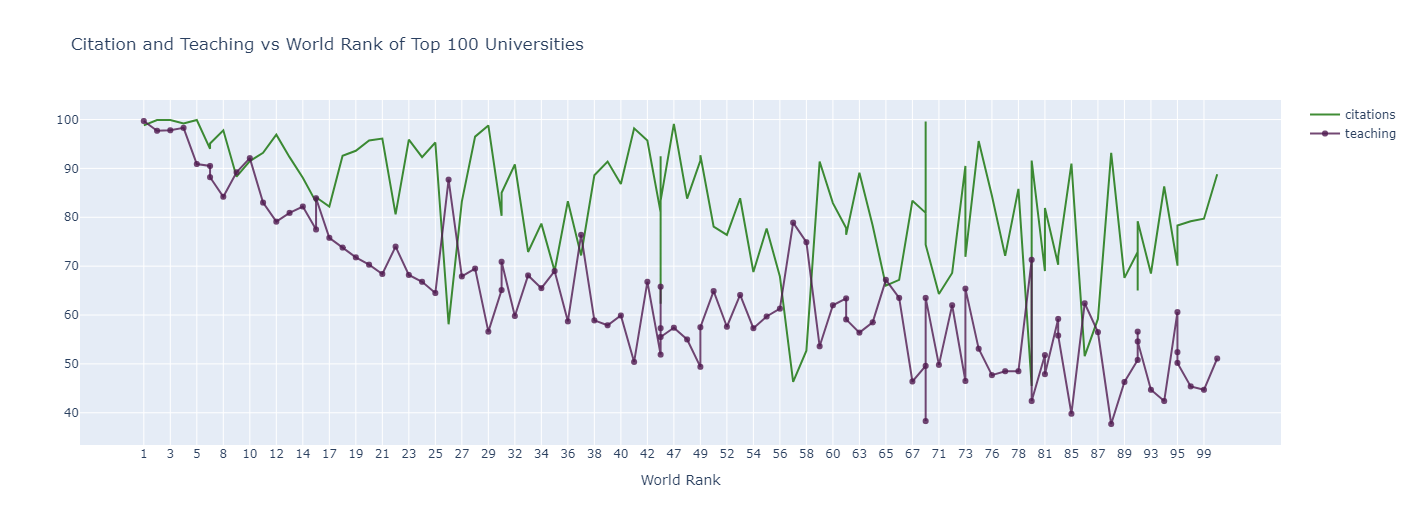

Bu plot yorumlandığında alıntı değerlerinin öğretme değerlerinden fazla olduğu görülür.

Üniversitelerin dünya sıralaması azaldığında öğretme değeri, alıntı yapma değerinin oldukça altına düşmektedir. Öğretme değeri öğrencilerin öğrenme oranıdır. Öğrencilerin öğrenme oranı düşşe de öğretmenlerin başarı oranı yüksektir.